# Data Preprocessing 

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.



- When creating a machine learning project, it is not always a case that we come across the clean and formatted data. 



- And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.

In [4]:
import pandas as pd
s = pd.Series(['10','20','30'])
s.astype(int)+100

0    110
1    120
2    130
dtype: int32

# What is the need of Data Preprocessing?

o A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. 


o Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.

#### It involves below steps:

    Getting the dataset
    Importing libraries
    Importing datasets
    Finding Missing Data
    Encoding Categorical Data
    Splitting dataset into training and test set
    Feature scaling


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# load the dataset
t = sns.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# check missing entries
t.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
t.deck

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [11]:
t.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [14]:
#country , age and salary
data = [['India',38.0,np.nan],  
    ['France',np.nan,45000.0],  
 [np.nan,30.0, 54000.0],  
 ['France' ,48.0, 65000.0], 
 ['Germany' ,40.0, np. nan],  
 ['India' ,35.0, 58000.0],  
 ['Germany', np.nan ,53000.0],  
 [np.nan ,49.0, 79000.0],  
 ['India', 50.0 ,88000.0],  
 ['France' ,37.0, 77000.0]]  
    

In [15]:
df = pd.DataFrame(data)
df

,0,1,2
0,India,38.0,NaN
1,France,NaN,45000.0
2,NaN,30.0,54000.0
3,France,48.0,65000.0
4,Germany,40.0,NaN
5,India,35.0,58000.0
6,Germany,NaN,53000.0
7,NaN,49.0,79000.0
8,India,50.0,88000.0
9,France,37.0,77000.0


In [16]:
#check null values
df.isna().sum()

0    2
1    2
2    2
dtype: int64

In [ ]:
#Assiggnment: check library "missingno"
# Plot the NaN present in your dataset

# Ways to handle missing data:

#### There are mainly two ways to handle missing data, which are:

- *By deleting the particular row:* The first way is used to commonly deal with null values. In this way, we just delete the specific row or column which consists of null values. But this way is not so efficient and removing data may lead to loss of information which will not give the accurate output.




- *By calculating the mean:* In this way, we will calculate the mean of that column or row which contains any missing value and will put it on the place of missing value. This strategy is useful for the features which have numeric data such as age, salary, year, etc. Here, we will use this approach. 

In [17]:
a= np.array([10,2,4,5,8,1,6])
a.mean()

5.142857142857143

In [18]:
b = pd.Series([1,24,1,1,1,1,5,6,7])
b.mode()

0    1
dtype: int64

In [19]:
b = pd.Series([10,10,20,20,30])
b.mode()

0    10
1    20
dtype: int64

In [22]:
c = pd.Series([4,5,2,2,1,100,50,5]) # 1 2 2 4 5 50 100
c.median() # (4+5)/2

4.5

In [23]:
df[:2]

,0,1,2
0,India,38.0,NaN
1,France,NaN,45000.0


In [24]:
df.fillna('missing') #fill missing at the place NaN

,0,1,2
0,India,38.0,missing
1,France,missing,45000.0
2,missing,30.0,54000.0
3,France,48.0,65000.0
4,Germany,40.0,missing
5,India,35.0,58000.0
6,Germany,missing,53000.0
7,missing,49.0,79000.0
8,India,50.0,88000.0
9,France,37.0,77000.0


In [27]:
df[0].fillna('Unknown')

0      India
1     France
2    Unknown
3     France
4    Germany
5      India
6    Germany
7    Unknown
8      India
9     France
Name: 0, dtype: object

In [29]:
df[1].fillna(df[1].mean()) #fill age column with its average

0    38.000
1    40.875
2    30.000
3    48.000
4    40.000
5    35.000
6    40.875
7    49.000
8    50.000
9    37.000
Name: 1, dtype: float64

In [30]:
# add new updated age column
df['newage'] = df[1].fillna(df[1].mean()) 

In [31]:
df

,0,1,2,newage
0,India,38.0,NaN,38.000
1,France,NaN,45000.0,40.875
2,NaN,30.0,54000.0,30.000
3,France,48.0,65000.0,48.000
4,Germany,40.0,NaN,40.000
5,India,35.0,58000.0,35.000
6,Germany,NaN,53000.0,40.875
7,NaN,49.0,79000.0,49.000
8,India,50.0,88000.0,50.000
9,France,37.0,77000.0,37.000


# SimpleImputer

In [32]:
from sklearn.impute import SimpleImputer 
#handling missing data (Replacing missing data with the mean value
#in respective column) 

#create an object of SimpleImputer
si = SimpleImputer()

#Other missing examples: -999 -99 -1 -111 NA ? '' ' ' None

In [ ]:
"""
The imputation strategy.

    - If "mean", then replace missing values using the mean along
      each column. Can only be used with numeric data.
    - If "median", then replace missing values using the median along
      each column. Can only be used with numeric data.
    - If "most_frequent", then replace missing using the most frequent
      value along each column. Can be used with strings or numeric data.
      If there is more than one such value, only the smallest is returned.
    - If "constant", then replace missing values with fill_value. Can be
      used with strings or numeric data.
"""

In [33]:
si

SimpleImputer()

In [34]:
#Fitting imputer object to the independent variables x.   
ndf = df.select_dtypes(exclude='object')
ndf

,1,2,newage
0,38.0,NaN,38.000
1,NaN,45000.0,40.875
2,30.0,54000.0,30.000
3,48.0,65000.0,48.000
4,40.0,NaN,40.000
5,35.0,58000.0,35.000
6,NaN,53000.0,40.875
7,49.0,79000.0,49.000
8,50.0,88000.0,50.000
9,37.0,77000.0,37.000


In [35]:
si.fit(ndf)

SimpleImputer()

In [36]:
#fit means training 
#it gives information about data u supplied
si.missing_values

nan

In [37]:
si.n_features_in_

3

In [38]:
si.strategy

'mean'

In [44]:
# check average for all columns
ndf.mean()

1            40.875
2         64875.000
newage       40.875
dtype: float64

In [49]:
#Replacing missing data with the calculated mean value using transform
#si.transform(ndf)[:,1:2]
si.transform(ndf)

array([[3.8000e+01, 6.4875e+04, 3.8000e+01],
       [4.0875e+01, 4.5000e+04, 4.0875e+01],
       [3.0000e+01, 5.4000e+04, 3.0000e+01],
       [4.8000e+01, 6.5000e+04, 4.8000e+01],
       [4.0000e+01, 6.4875e+04, 4.0000e+01],
       [3.5000e+01, 5.8000e+04, 3.5000e+01],
       [4.0875e+01, 5.3000e+04, 4.0875e+01],
       [4.9000e+01, 7.9000e+04, 4.9000e+01],
       [5.0000e+01, 8.8000e+04, 5.0000e+01],
       [3.7000e+01, 7.7000e+04, 3.7000e+01]])

In [55]:
# replae new transformed age values in age column of ndf
ndf[1] = si.transform(ndf)[:,0]

C:\Users\hakim\AppData\Local\Temp/ipykernel_21632/2942642187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[1] = si.transform(ndf)[:,0]


In [56]:
ndf

,1,2,newage
0,38.000,NaN,38.000
1,40.875,45000.0,40.875
2,30.000,54000.0,30.000
3,48.000,65000.0,48.000
4,40.000,NaN,40.000
5,35.000,58000.0,35.000
6,40.875,53000.0,40.875
7,49.000,79000.0,49.000
8,50.000,88000.0,50.000
9,37.000,77000.0,37.000


In [57]:
# if we want to perform fit and transform together?
si.fit_transform(ndf)

array([[3.8000e+01, 6.4875e+04, 3.8000e+01],
       [4.0875e+01, 4.5000e+04, 4.0875e+01],
       [3.0000e+01, 5.4000e+04, 3.0000e+01],
       [4.8000e+01, 6.5000e+04, 4.8000e+01],
       [4.0000e+01, 6.4875e+04, 4.0000e+01],
       [3.5000e+01, 5.8000e+04, 3.5000e+01],
       [4.0875e+01, 5.3000e+04, 4.0875e+01],
       [4.9000e+01, 7.9000e+04, 4.9000e+01],
       [5.0000e+01, 8.8000e+04, 5.0000e+01],
       [3.7000e+01, 7.7000e+04, 3.7000e+01]])

In [58]:
ndf

,1,2,newage
0,38.000,NaN,38.000
1,40.875,45000.0,40.875
2,30.000,54000.0,30.000
3,48.000,65000.0,48.000
4,40.000,NaN,40.000
5,35.000,58000.0,35.000
6,40.875,53000.0,40.875
7,49.000,79000.0,49.000
8,50.000,88000.0,50.000
9,37.000,77000.0,37.000


In [59]:
# using constant
new_si = SimpleImputer(strategy='constant',fill_value=-11)

In [62]:
new_si.fit_transform(ndf)

array([[ 3.8000e+01, -1.1000e+01,  3.8000e+01],
       [ 4.0875e+01,  4.5000e+04,  4.0875e+01],
       [ 3.0000e+01,  5.4000e+04,  3.0000e+01],
       [ 4.8000e+01,  6.5000e+04,  4.8000e+01],
       [ 4.0000e+01, -1.1000e+01,  4.0000e+01],
       [ 3.5000e+01,  5.8000e+04,  3.5000e+01],
       [ 4.0875e+01,  5.3000e+04,  4.0875e+01],
       [ 4.9000e+01,  7.9000e+04,  4.9000e+01],
       [ 5.0000e+01,  8.8000e+04,  5.0000e+01],
       [ 3.7000e+01,  7.7000e+04,  3.7000e+01]])

# Encoding Categorical data:

- Categorical data is data which has some categories such as,  Country


- Since machine learning model completely works on mathematics and numbers, but if our dataset would have a categorical variable, then it may create trouble while building the model. So it is necessary to encode these categorical variables into numbers. 

In [ ]:
df[0]

In [ ]:
df[0].unique()

In [ ]:
# using replace
df[0].replace({'India':1,'France':2,'Germany':3})

In [ ]:
# using map
df[0].map({'India':1,'France':2,'Germany':3})

# sklearn.preprocessing

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()
#lets supply country data present at 0 index
lb.fit_transform(df[0])
#in above case labelencoder converted India as 2, France as 0 and germany as 1

In [ ]:
lb.classes_
#LabelEncoder follows Alphabatic order a-z

In [ ]:
df[0].values

In [ ]:
g = pd.DataFrame({'gender':['male','female','female','male','male','female'],
             'cat':['A','A','A','B','C','C']})
g

In [ ]:
lb2 = LabelEncoder()
#labelEncode accepts only 1D data
lb2.fit(g['gender'])

In [ ]:
lb2.classes_

In [ ]:
g.gender

In [ ]:
lb2.transform(g.gender)

In [ ]:
lb2.classes_

In [ ]:
# i will use titanic dataset
# in which we have sex column will convert Male and Female in 1 and 0
import seaborn as sns
t = sns.load_dataset('titanic')
t['sex']

In [ ]:
#use lb2 to convert above series into 0 &1
lb2.transform(t['sex'])

In [ ]:
lb2.transform(['female','male','male','female'])

In [ ]:
new_data= [1,1,1,1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,1]
new_data

In [ ]:
#Convert above 0 & 1 into Category male and female
lb2.inverse_transform([0,0,0,1,1,])

In [ ]:
# Interview question:
# What are different ways to deal with Categorical data?
# How to convert categorical data using pandas
# how to convert categorical data using sklearn.preprocessing

# Dummy Variables:

- Dummy variables are those variables which have values 0 or 1. 


- The 1 value gives the presence of that variable in a particular column, and rest variables become 0. 


- With dummy encoding, we will have a number of columns equal to the number of categories.


In [2]:
import pandas as pd
place = pd.DataFrame({'data':['Katraj','Camp','Hadapsar','Katraj','Katraj','Hadapsar','Camp','Camp','Hadapsar']})

#Conversion like:
"""
camp  Hadpsr katraj
0       0      1
1       0      0
"""
place

,data
0,Katraj
1,Camp
2,Hadapsar
3,Katraj
4,Katraj
5,Hadapsar
6,Camp
7,Camp
8,Hadapsar


In [3]:
place.data.unique()

array(['Katraj', 'Camp', 'Hadapsar'], dtype=object)

#### Wherever we have categorical data in a column, there u have to apply OneHotEncoder

In [4]:
#Encoding for dummy variables using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
ob = OneHotEncoder()

In [6]:
place.shape

(9, 1)

In [7]:
convert = ob.fit_transform(place)
convert
#return sparse matrix

<9x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [8]:
final = convert.toarray()
final

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [9]:
#check the sequence of conversion
ob.categories_

[array(['Camp', 'Hadapsar', 'Katraj'], dtype=object)]

In [10]:
final

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [15]:
#convert final into dataFrame
fin = pd.DataFrame(final,dtype=int,columns=['camp','hadapsar','katraj'])
fin

,camp,hadapsar,katraj
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,1,0
6,1,0,0
7,1,0,0
8,0,1,0


In [16]:
d1 = pd.concat([place,fin],axis=1)
d1[:4]

,data,camp,hadapsar,katraj
0,Katraj,0,0,1
1,Camp,1,0,0
2,Hadapsar,0,1,0
3,Katraj,0,0,1


In [17]:
# remove data column , bcz further it is not required
d1.drop(columns='data',inplace=True)

In [18]:
d1

,camp,hadapsar,katraj
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,1,0
6,1,0,0
7,1,0,0
8,0,1,0


## Using pandas: get_dummies()

#### alternative option and simple option to OneHot is get_dummies() of pandas

In [19]:
place

,data
0,Katraj
1,Camp
2,Hadapsar
3,Katraj
4,Katraj
5,Hadapsar
6,Camp
7,Camp
8,Hadapsar


In [25]:
out = pd.get_dummies(place)
out.loc[:,['data_Camp','data_Hadapsar']]

,data_Camp,data_Hadapsar
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0
5,0,1
6,1,0
7,1,0
8,0,1


In [37]:
#place.apply(lambda x: 1 if x == 'Katraj' else 0)
place['data'].str.replace('Katraj','1')

0           1
1        Camp
2    Hadapsar
3           1
4           1
5    Hadapsar
6        Camp
7        Camp
8    Hadapsar
Name: data, dtype: object

In [24]:
# check correlation
out.corr()

,data_Camp,data_Hadapsar,data_Katraj
data_Camp,1.0,-0.5,-0.5
data_Hadapsar,-0.5,1.0,-0.5
data_Katraj,-0.5,-0.5,1.0


In [22]:
place

,data
0,Katraj
1,Camp
2,Hadapsar
3,Katraj
4,Katraj
5,Hadapsar
6,Camp
7,Camp
8,Hadapsar


#### Problem:-----> Dummy Variable trap

## https://www.statology.org/dummy-variable-trap/

In [38]:
import seaborn as sns
t = sns.load_dataset('titanic')
t.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [41]:
# check data types
t.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [42]:
# select only Categorical columns
t.select_dtypes(['object','category'])

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,NaN,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,NaN,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,NaN,Southampton,no
...,...,...,...,...,...,...,...
886,male,S,Second,man,NaN,Southampton,no
887,female,S,First,woman,B,Southampton,yes
888,female,S,Third,woman,NaN,Southampton,no
889,male,C,First,man,C,Cherbourg,yes


In [39]:
ob

OneHotEncoder()

In [43]:
out = ob.fit_transform(t[['class']])
out

<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [44]:
# matrix--> array
arr = out.toarray()
arr = pd.DataFrame(arr,columns=list(ob.categories_),dtype=int)
arr

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [45]:
pd.concat([t,arr],axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,"(First,)","(Second,)","(Third,)"
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,1,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,0,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1,0,0


In [46]:
# labelEncoder
from sklearn.preprocessing import LabelEncoder

In [47]:
lb_obj = LabelEncoder()
lb_obj.fit_transform(t[['class']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,

In [48]:
# using get dummies
pd.get_dummies(t[['class']])

,class_First,class_Second,class_Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [ ]:
# How to deal with categorical data
# WHat are different encoding techniques?
# difference btween onehot and get_dummies
# labelEncoder vs OneHotEnc vs get_dummies

# Feature Scaling

- Feature scaling is the final step of data preprocessing in machine learning. 


- It is a technique to standardize the independent variables of the dataset in a specific range. 


- In feature scaling, we put our variables in the same range and in the same scale so that no any variable dominate the other variable. 

#age = 30,40,50
#salary = 65000,56000,150000,240000

### There are 2 types:
    - Standardization x-M(mue/meanofX)/sigma (std deviation)
    - Normalization x- min(x)/(max(x)-min(x))

### StandardScaler

In [ ]:
# StandardScaler   # x -mean(total_x)/std(total_x) -3 to +3

In [49]:
#load boston_housing dataset
import numpy as np
import pandas as pd

df = pd.read_csv('boston.csv')
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [51]:
#load StandardScalar
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()

In [53]:
new = sc.fit_transform(df)
new

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [55]:
df.shape

(506, 14)

In [54]:
sc.mean_

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01, 2.25328063e+01])

In [56]:
sc.n_features_in_

14

In [58]:
#lets convert  new to df
ndf = pd.DataFrame(new,columns=df.columns)
ndf.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524


In [59]:
df[:2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


<AxesSubplot:>

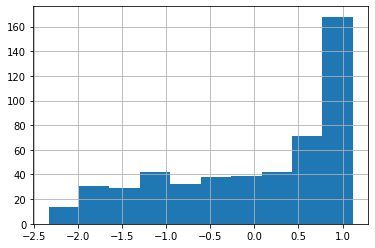

In [62]:
ndf['AGE'].hist()

<AxesSubplot:>

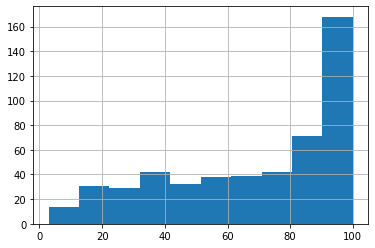

In [63]:
df['AGE'].hist()

In [64]:
# original
df.iloc[:,:5].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710


In [65]:
# after scaling
ndf.iloc[:,:5].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,-8.513173e-17,1.00099,-0.419782,-0.410970,-0.390667,0.007397,9.933931
ZN,506.0,3.306534e-16,1.00099,-0.487722,-0.487722,-0.487722,0.048772,3.804234
INDUS,506.0,2.804081e-16,1.00099,-1.557842,-0.867691,-0.211099,1.015999,2.422565
CHAS,506.0,-3.100287e-16,1.00099,-0.272599,-0.272599,-0.272599,-0.272599,3.668398
NOX,506.0,-8.071058e-16,1.00099,-1.465882,-0.913029,-0.144217,0.598679,2.732346


### MinMaxScaler

In [ ]:
# MinMaxScaler  # x- min()/(max()-min())
#range of minMax scalar is 0 to 1

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
mx = MinMaxScaler()
norm = mx.fit_transform(df)
normdf = pd.DataFrame(norm,columns=df.columns)
normdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


<AxesSubplot:ylabel='Frequency'>

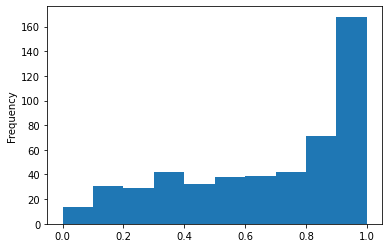

In [69]:
normdf['AGE'].plot.hist()

In [70]:
normdf.iloc[:,:5].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.040544,0.096679,0.0,0.000851,0.002812,0.041258,1.0
ZN,506.0,0.113636,0.233225,0.0,0.000000,0.000000,0.125000,1.0
INDUS,506.0,0.391378,0.251479,0.0,0.173387,0.338343,0.646628,1.0
CHAS,506.0,0.069170,0.253994,0.0,0.000000,0.000000,0.000000,1.0
NOX,506.0,0.349167,0.238431,0.0,0.131687,0.314815,0.491770,1.0


In [ ]:
# Q. Standardization vs Normalization
# When to use StandardScaler and MinMaxScaler
# Formula is imp

### Binarizer

In [ ]:
# Binarizer is threshold based
# threshold  depends on condition
"""
Values greater than the threshold map to 1, while values less than
or equal to the threshold map to 0. With the default threshold of 0,
only positive values map to 1.
"""

In [71]:
from sklearn.preprocessing import Binarizer

In [72]:
#select target column from df
#which contains prices
out = pd.DataFrame([120,340,100,199,200,120,220,340,450])
out.head()

,0
0,120
1,340
2,100
3,199
4,200


In [73]:
bi = Binarizer(threshold=120)
# values >120 ==>1
#values =<120 ==> 0

In [77]:
out.values.ravel()

array([120, 340, 100, 199, 200, 120, 220, 340, 450], dtype=int64)

In [74]:
bi.fit_transform(out)

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [ ]:
print(out)

In [ ]:
m = pd.DataFrame(['male','female','male','male'])
m

In [ ]:
nbn = Binarizer(threshold='male')
nbn.fit_transform(m)
# Conclusion is:only applicable over the numbers